In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import ndimage
from diagnostics.stark_broadening import *

path = '/media/robert/Data_Storage/Data/Experimental/Stark_Broadening/6-5-19_Spectrometer/'

In [2]:
l, N = setup(path, 'michaelito')

Spectrometer range 194.47nm to 1125.41nm
Number of pixels 3648
Datasets found: dict_keys(['1906050004', '1906050005', '1906050006', '1906050007', '1906050008', '1906050009', '1906050010', '1906050011', '1906050012', '1906050013', '1906050014', '1906050015', '1906050016', '1906050017', '1906050018', '1906050019', '1906050020', '1906050021', '1906050022', '1906050023', '1906050024', '1906050025', '1906050026', '1906050027'])


In [3]:
dataset = '1906050014'
spectrum = np.load(path+dataset+'/michaelito_'+dataset+'_0000.npy').item()
l = spectrum['lambda']
N = len(l)

In [4]:
def adjust(data, background, start, end):
    data_adjusted = data - background
    data_adjusted -= np.average(data_adjusted[start:end])
    return data_adjusted

In [5]:
# Helium lines with intensity greater than 100
lines = np.array([3888.6456, 3888.6489, 4471.479, 4921.931, 5015.678, 5875.6148, 5875.6404, 5875.9663, 6678.1517,
                  7065.1771, 10829.0911, 10830.2501, 10830.3398])
lines = lines/10
# Singly ionized Helium lines
lines2 = np.array([4685.7038, 4685.7044, 6560.10])
lines2 = lines2/10

lines_c = np.append(lines, lines2)
# Weaker lines we have also been able to identify
lines_w = np.array([402.6191, 438.7929, 471.3146, 728.135])

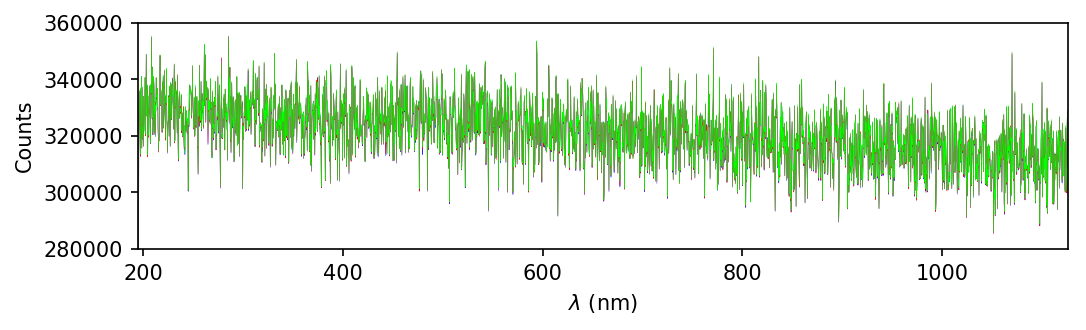

In [6]:
background0 = integrate_dataset(1906050011)
background1 = integrate_dataset(1906050014)
background2 = integrate_dataset(1906050020)
background = (background1+background2)/2
plot_spectrum(background0, background1, background2, ylim=(280000, 360000))

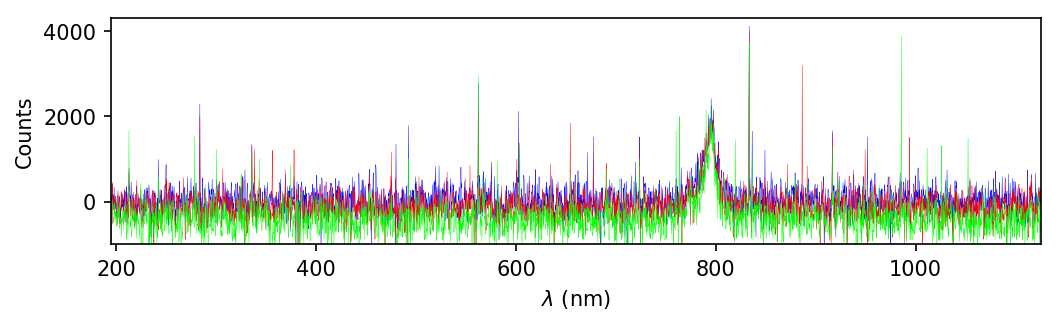

In [7]:
# Strange 1e15 dataset before removing beam block and retaking background
set1 = integrate_dataset(1906050012)
plot_spectrum(set1-background0, set1-background1, set1-background2)
# I think the conclusion might be that the signal was a bit too small

In [8]:
densities = np.array([1.25e15, 2.5e15, 7.5e15, 1e16, 2.5e16, 5e16, 7.5e16, 1e17, 1.5e17, 2.5e17, 5e17])
intensity = np.zeros((len(densities), N))
intensity[0] = adjust(integrate_dataset(1906050015), background, 0, 800)
intensity[1] = adjust(integrate_dataset(1906050016), background, 0, 800)
intensity[2] = adjust(integrate_dataset(1906050017), background, 0, 800)
intensity[3] = adjust(integrate_dataset(1906050018), background, 0, 800)
intensity[4] = adjust(integrate_dataset(1906050019), background, 0, 800)
intensity[5] = adjust(integrate_dataset(1906050021), background, 0, 800)
intensity[6] = adjust(integrate_dataset(1906050022), background, 0, 800)
intensity[7] = adjust(integrate_dataset(1906050023), background, 0, 800)
intensity[8] = adjust(integrate_dataset(1906050024), background, 0, 800)
intensity[9] = adjust(integrate_dataset(1906050025), background, 0, 800)
intensity[10] = adjust(integrate_dataset(1906050027), background, 0, 800)

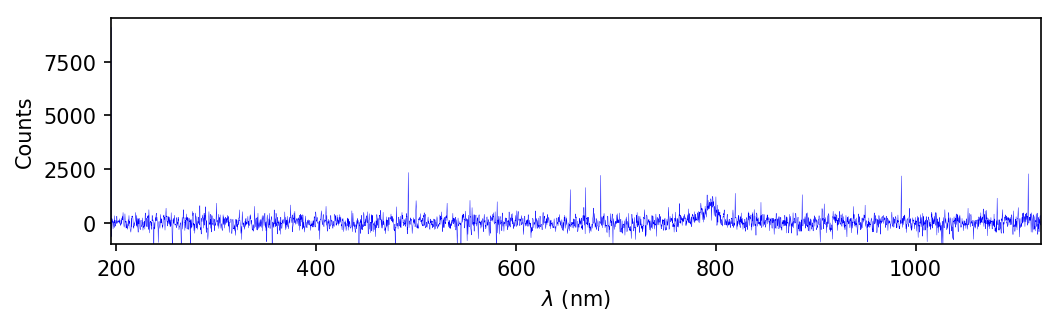

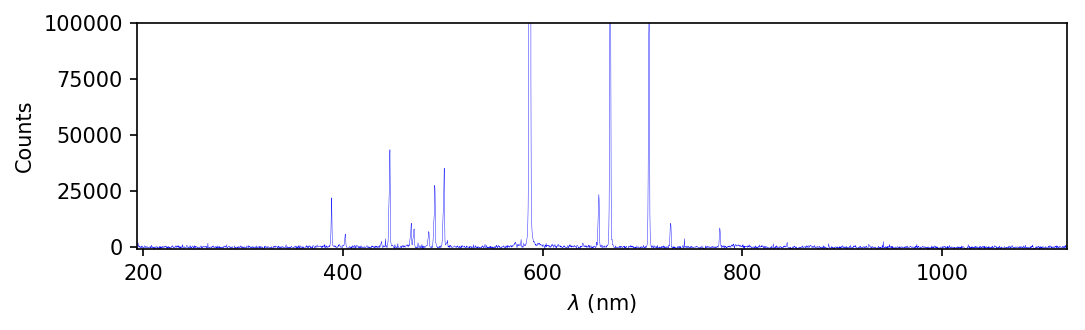

In [9]:
plot_spectrum(intensity[0])
plot_spectrum(intensity[10], ylim=(-1000, 1e5))

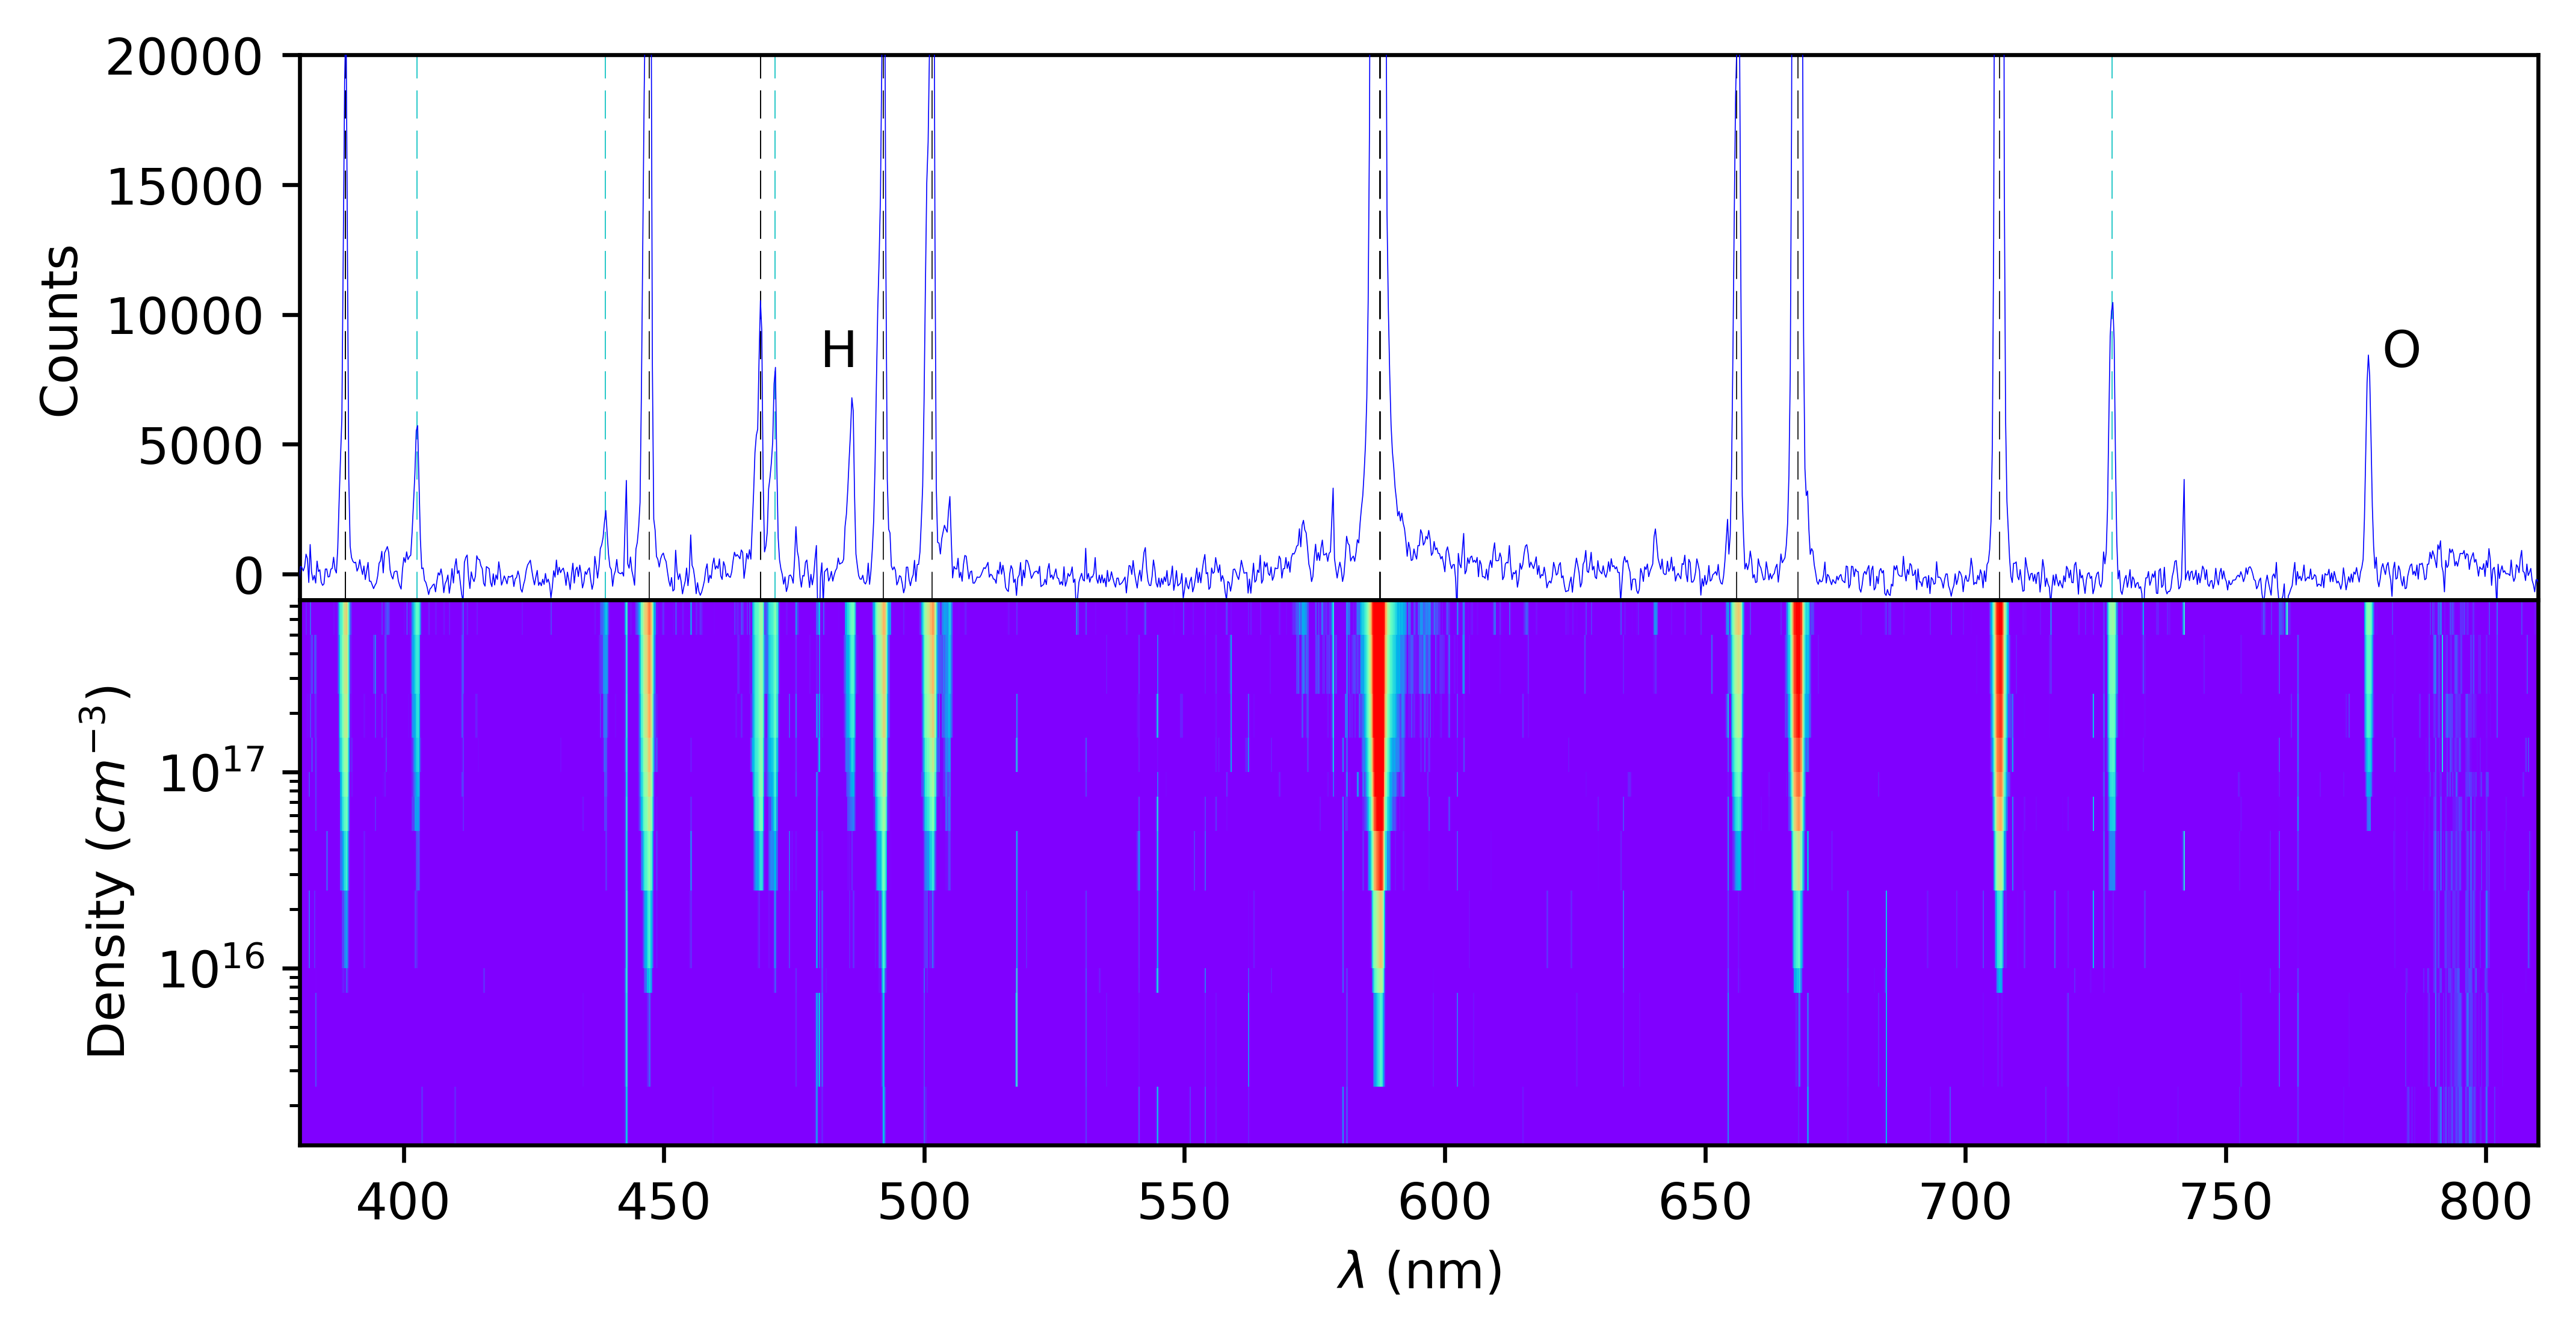

In [10]:
# Make heat map here
fig = plt.figure(figsize=(8, 4), dpi=600)
ax = plt.subplot(211)
color_set = [plt.cm.brg(i) for i in np.linspace(0, 1, 1)]
ax.set_prop_cycle('color', color_set)
plt.plot(l, intensity[10], linewidth=0.2, zorder=10)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Counts')
ylim = [-1000, 20000]
plt.ylim(ylim)
for i in range(len(lines_c)):
    line = lines_c[i]
    plt.plot([line, line], [ylim[0], ylim[1]], 'k--', linewidth=0.2, zorder=0)
    
for i in range(len(lines_w)):
    line = lines_w[i]
    plt.plot([line, line], [ylim[0], ylim[1]], 'c--', linewidth=0.2, zorder=0)

plt.text(480, 8000, 'H')
plt.text(780, 8000, 'O')
norm = colors.LogNorm(vmin=6e2, vmax=1e5)
plt.subplot(212, sharex=ax)
extent = [l[0], l[-1], densities[-1], densities[0]]
X,Y = np.meshgrid(l, np.append(densities, 7.5e17))
plt.pcolor(X, Y, abs(intensity), norm=norm, cmap='rainbow')
plt.yscale('log')
plt.ylabel(r'Density ($cm^{-3}$)')
plt.xlim(380, 810)
plt.xlabel('$\lambda$ (nm)')
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
plt.show()

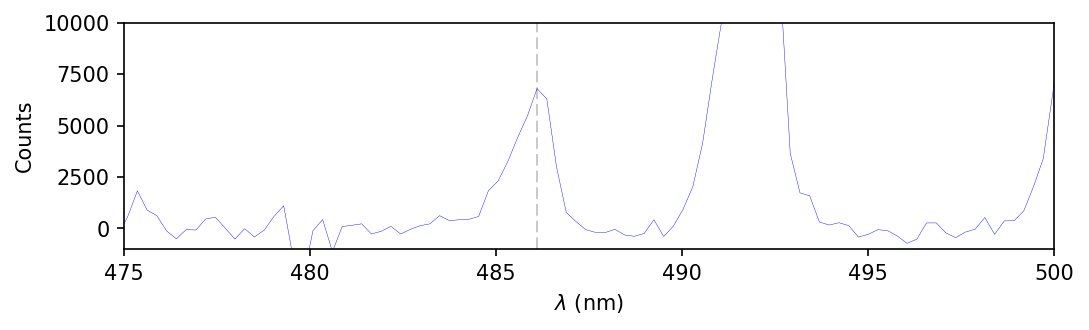

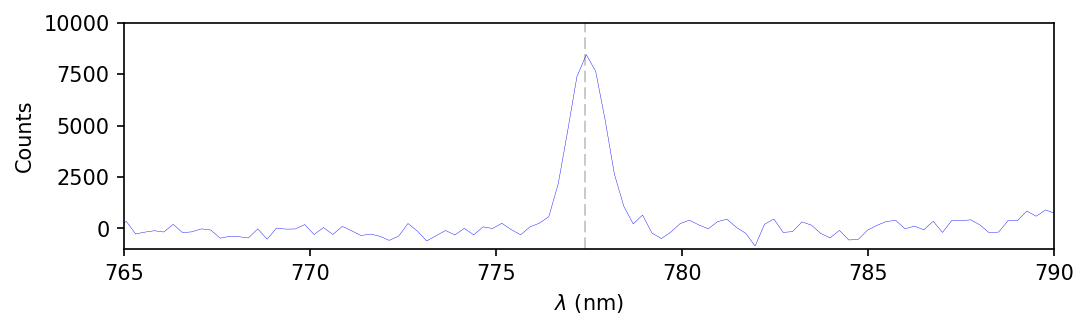

In [11]:
# First unknown line is at around 486.1, which is a Hydrogen line
plot_spectrum(intensity[10], ylim=(-1000, 1e4), xlim=(475, 500), lines=[486.1])
# Second unknown line is at 777.4, which is an oxygen line
plot_spectrum(intensity[10], ylim=(-1000, 1e4), xlim=(765, 790), lines=[777.4])
# There is almost for sure some water contamination, seems to come in through the Helium line

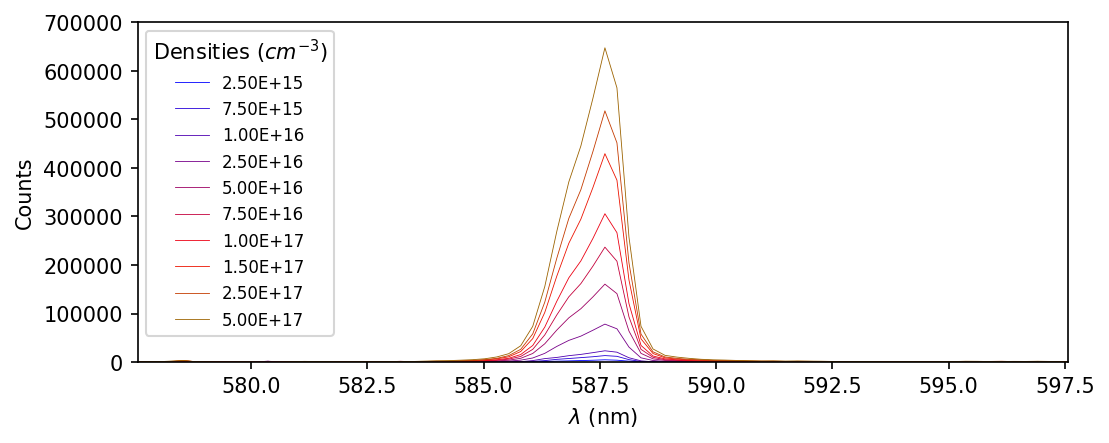

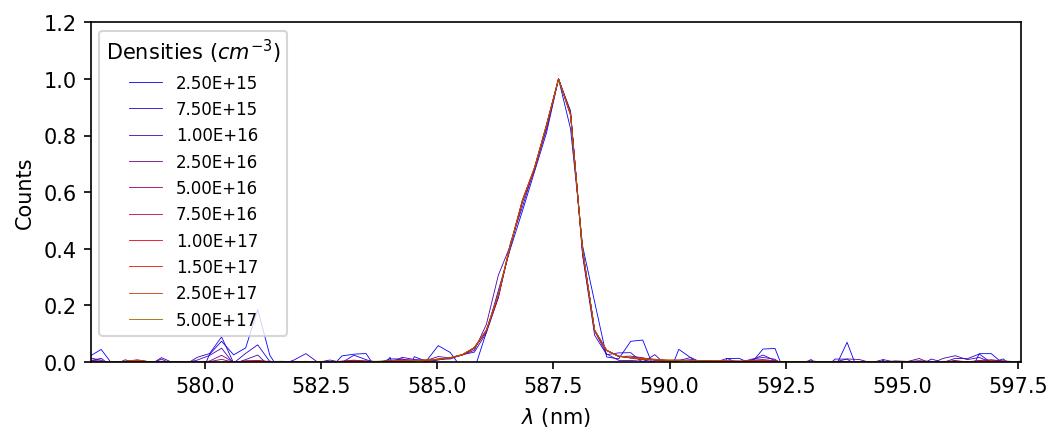

In [12]:
# Looking for stark broadening on the widest lines
plot_line(intensity[1:], densities[1:], 587.56, ylim=(0, 700000), lines=[5875.6148, 5875.6404, 5875.9663])

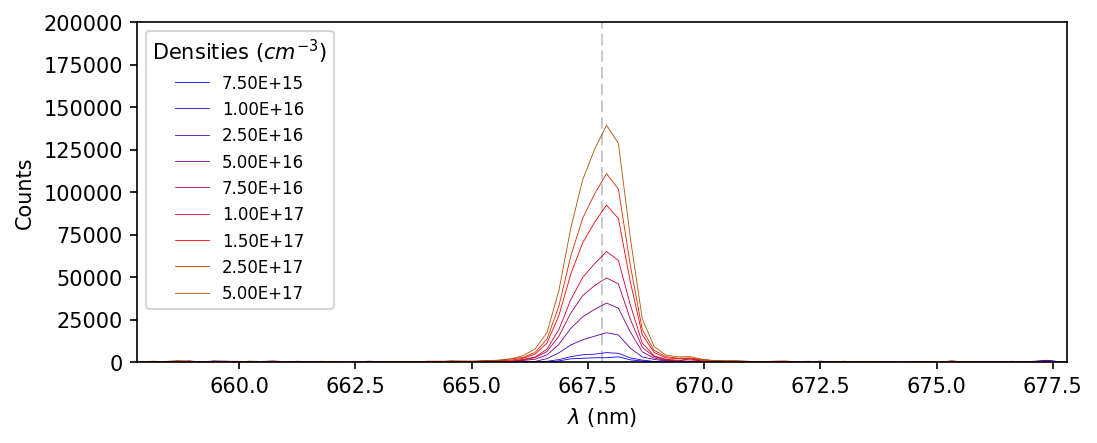

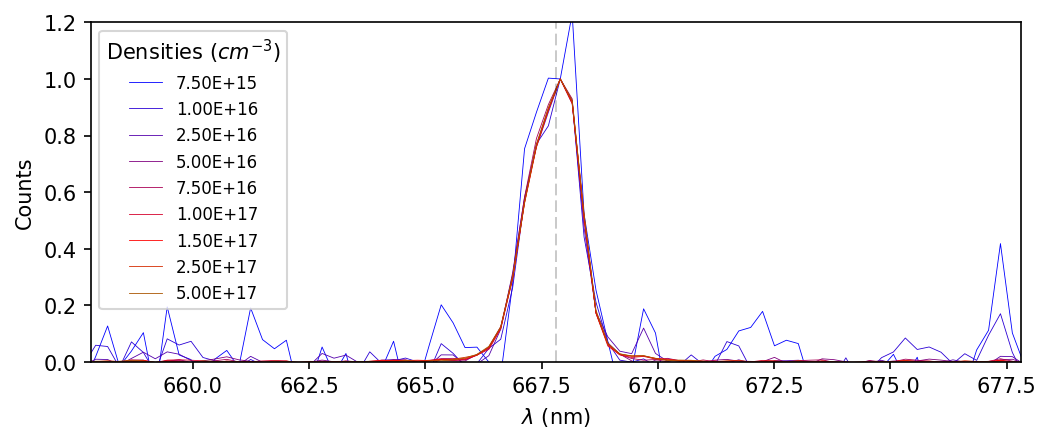

In [13]:
plot_line(intensity[2:], densities[2:], 667.81517, ylim=(0, 200000), lines=[667.81517])

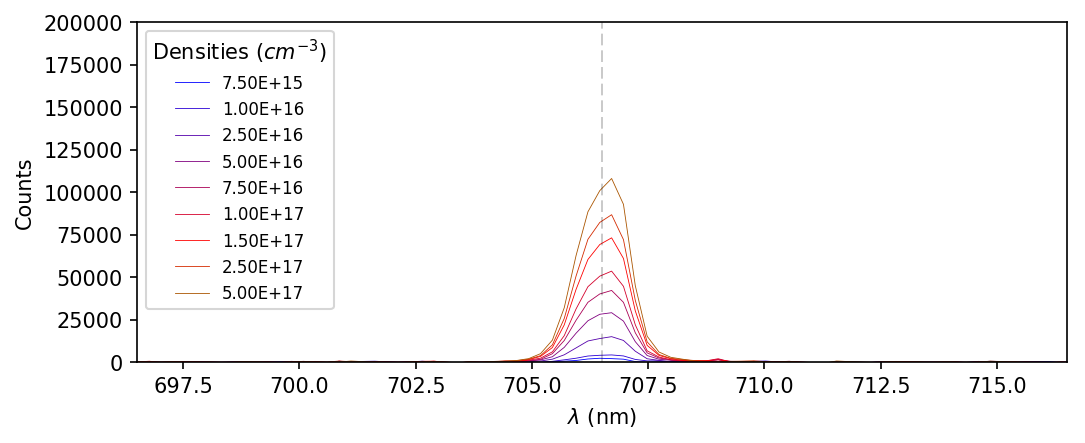

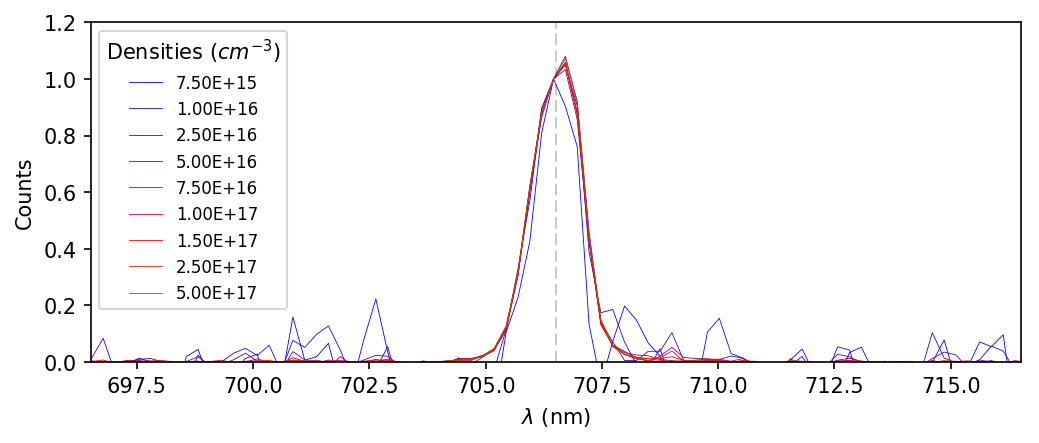

In [14]:
plot_line(intensity[2:], densities[2:], 706.51771, ylim=(0, 200000), lines=[706.51771])

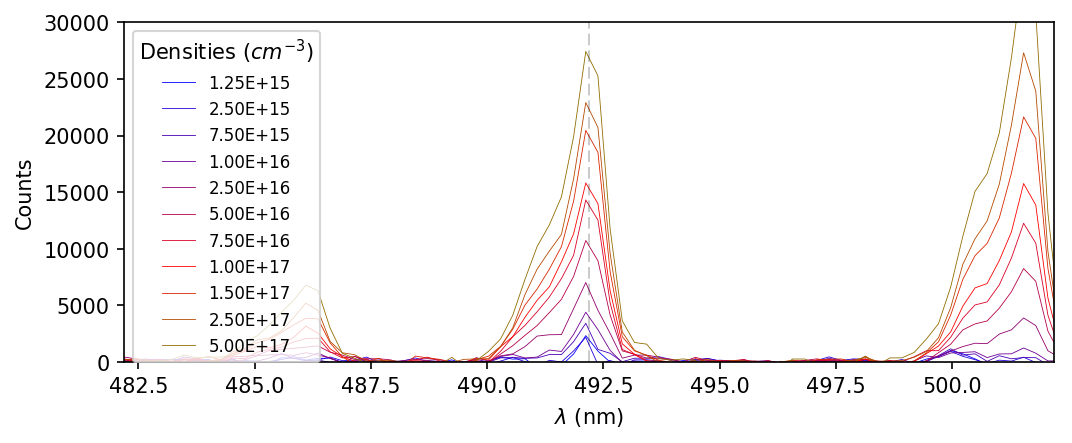

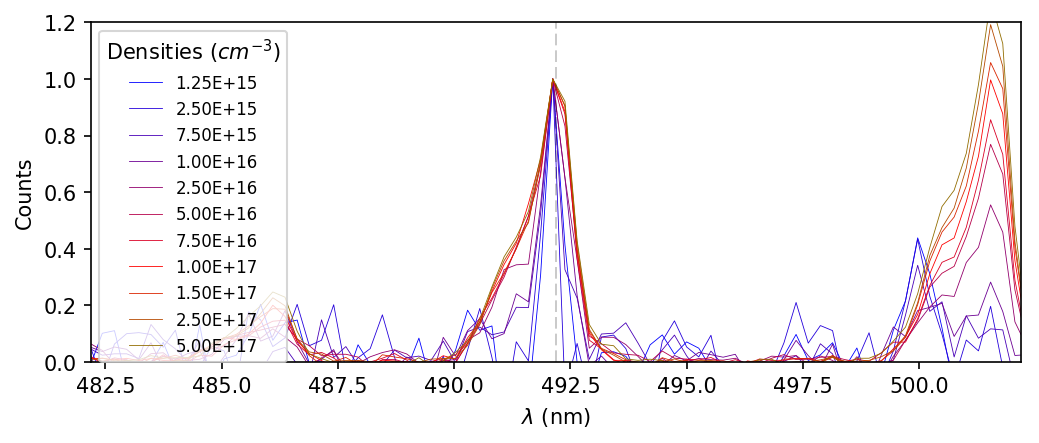

In [15]:
plot_line(intensity[:], densities[:], 492.1931, ylim=(0, 30000), lines=[492.1931])

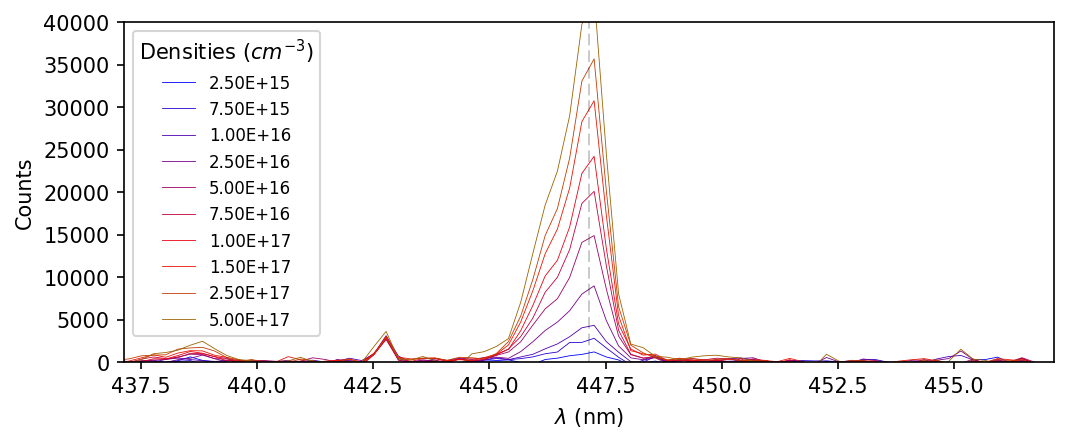

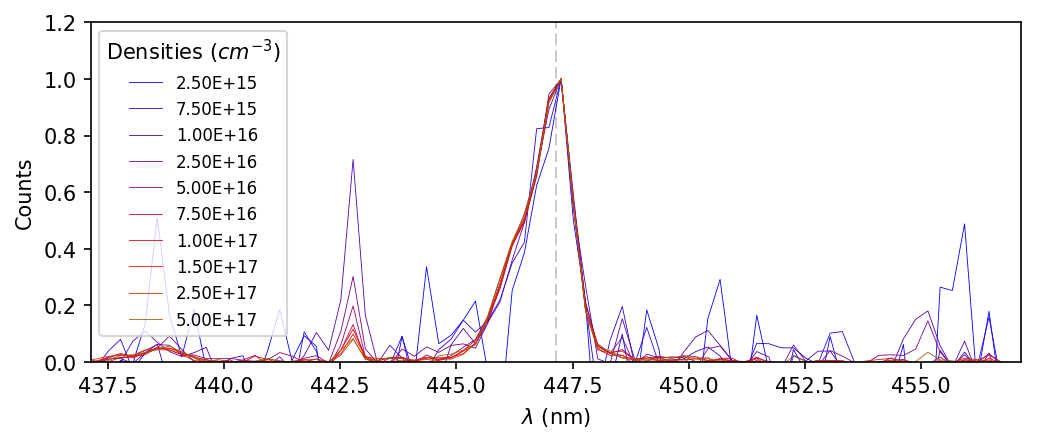

In [16]:
plot_line(intensity[1:], densities[1:], 447.1479, ylim=(0, 40000), lines=[447.1479])

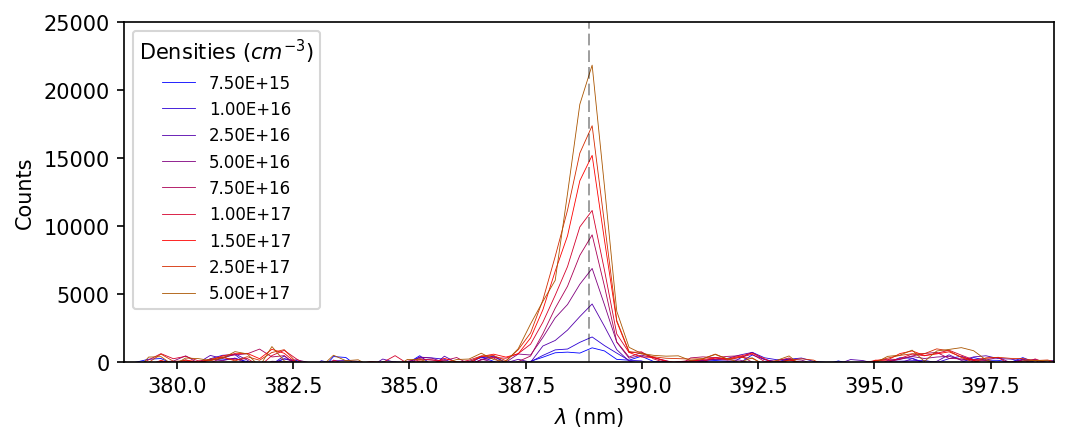

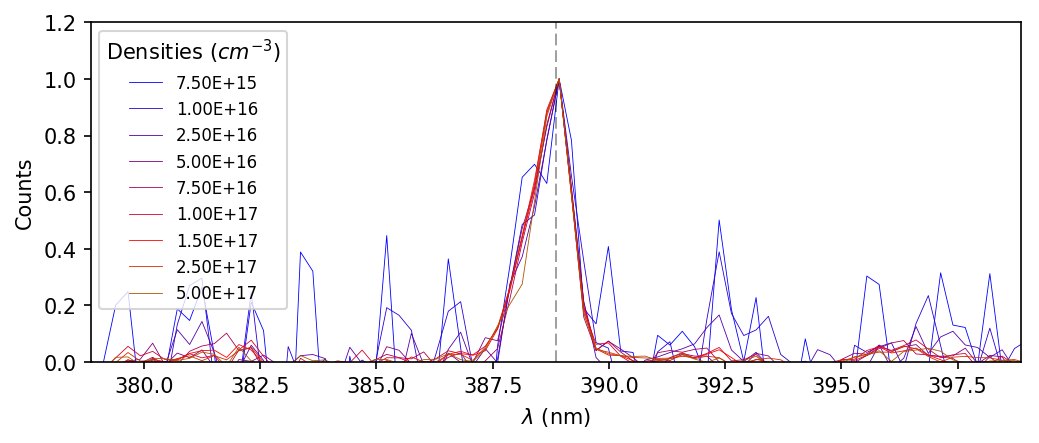

In [17]:
plot_line(intensity[2:], densities[2:], 388.86456, ylim=(0, 25000), lines=[388.86456, 388.86489])

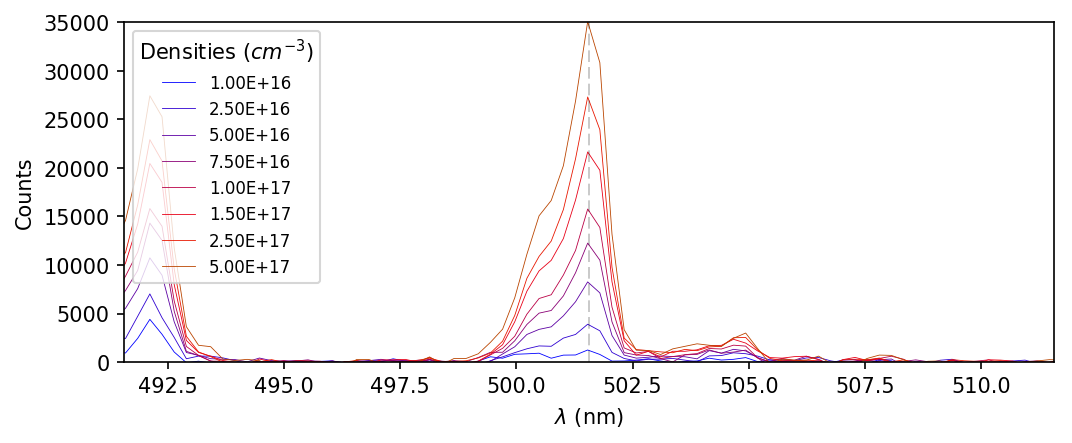

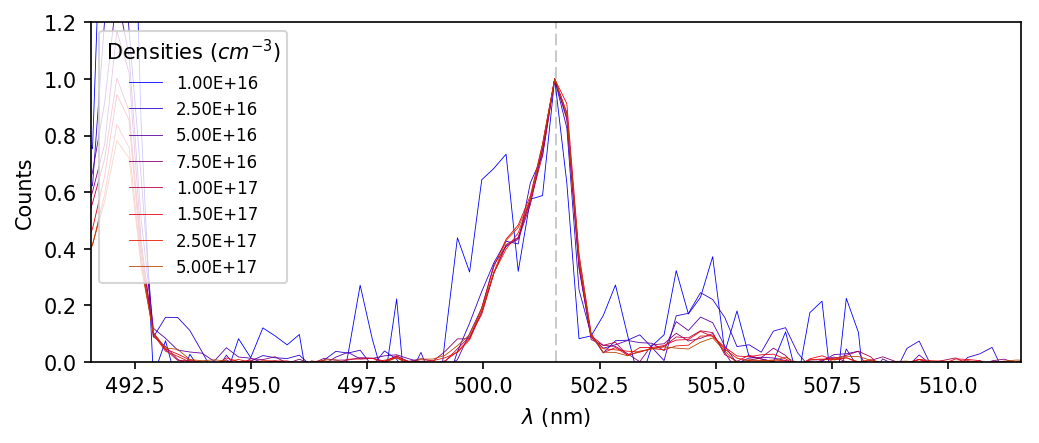

In [18]:
plot_line(intensity[3:], densities[3:], 501.5678, ylim=(0, 35000), lines=[501.5678])

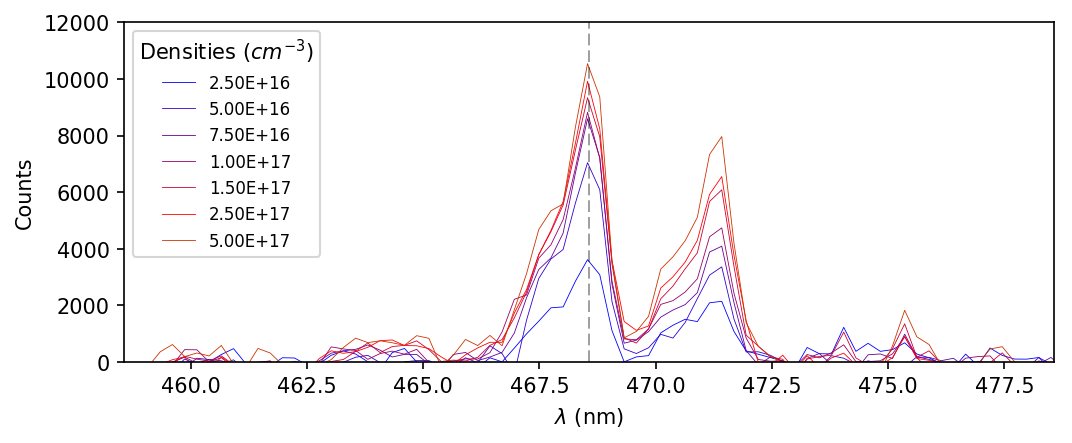

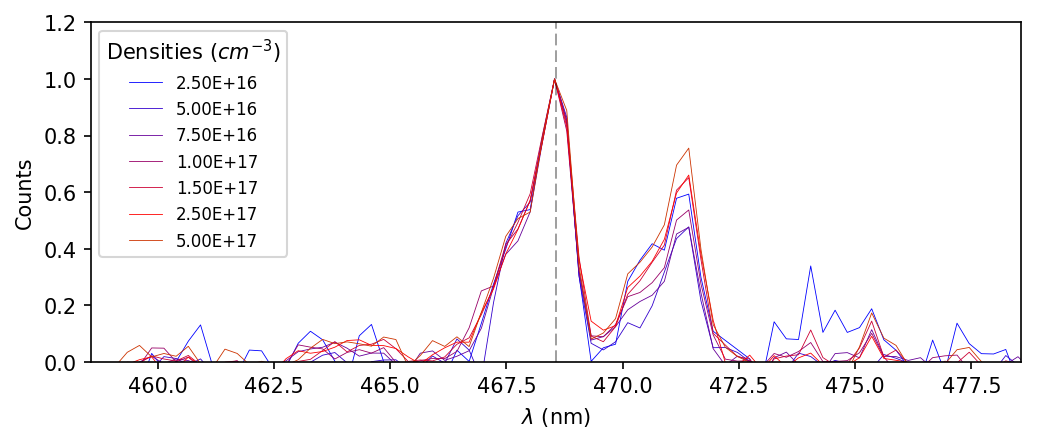

In [23]:
plot_line(intensity[4:], densities[4:], 468.57038, ylim=(0, 12000), lines=[468.57038, 468.57044])

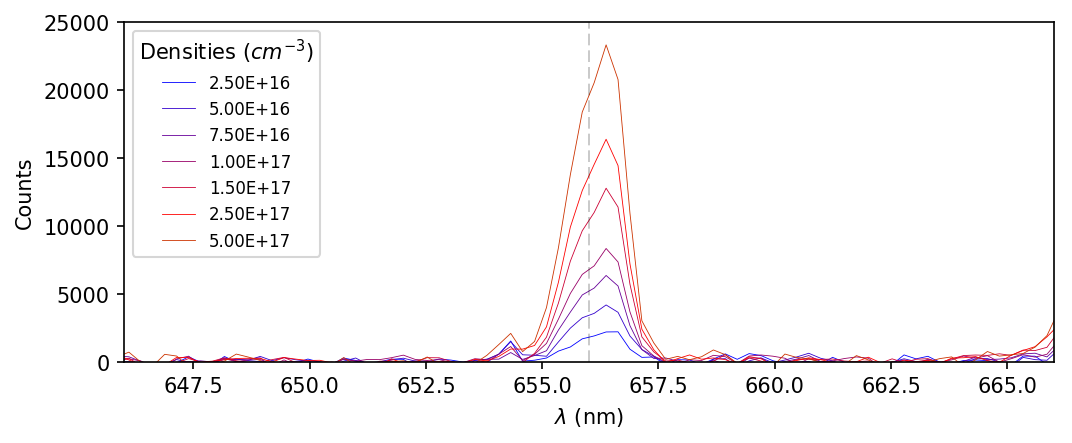

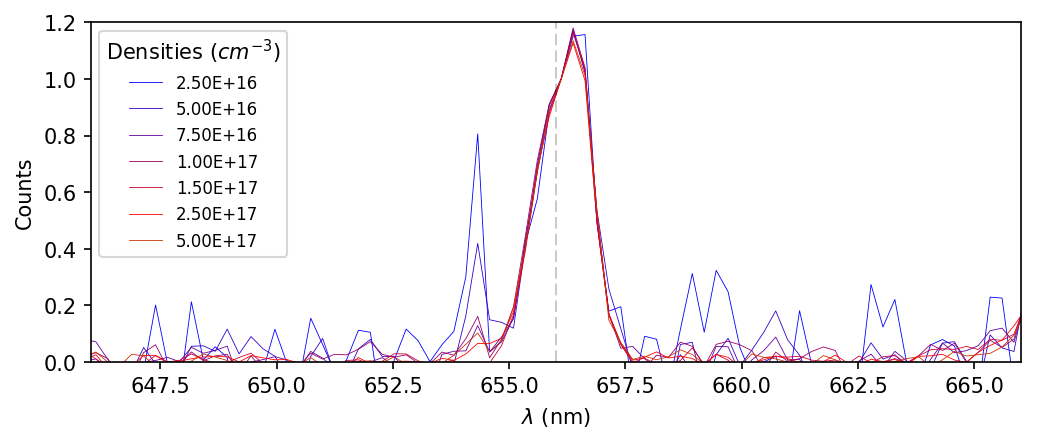

In [26]:
plot_line(intensity[4:], densities[4:], 656.010, ylim=(0, 25000), lines=[656.010])

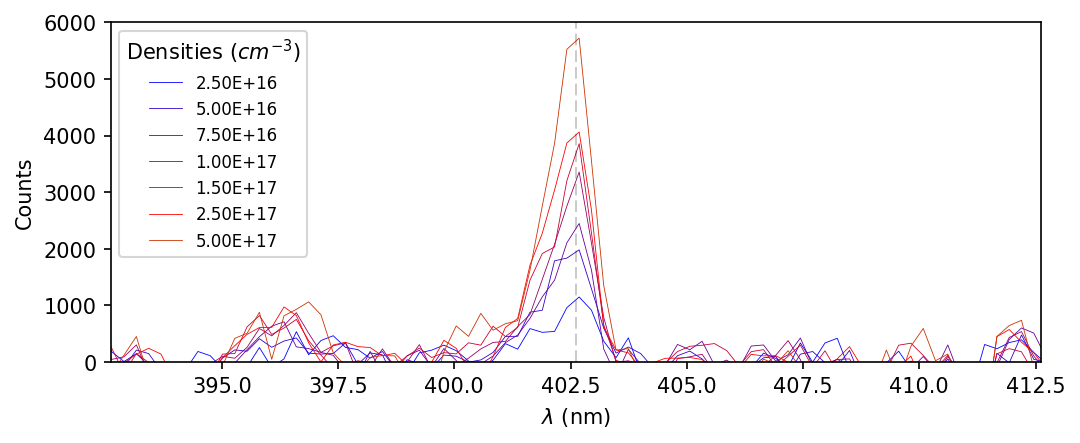

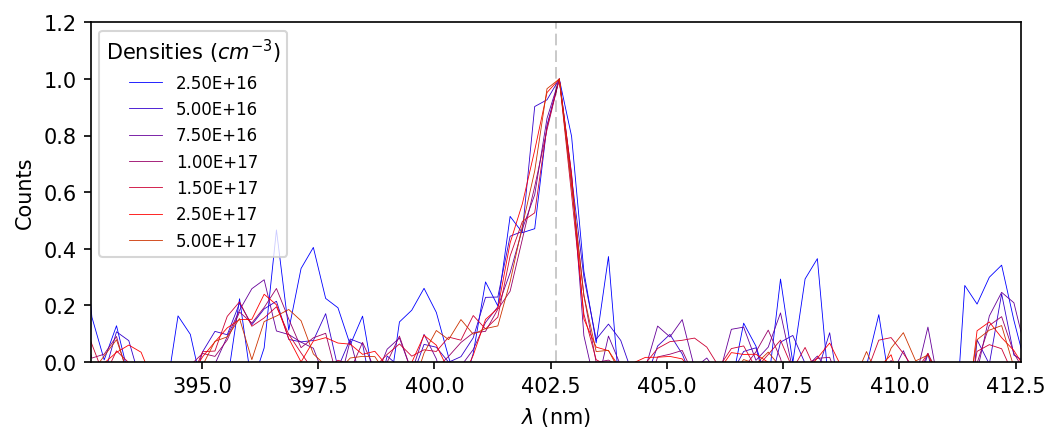

In [30]:
plot_line(intensity[4:], densities[4:], 402.6191, ylim=(0, 6000), lines=[402.6191])

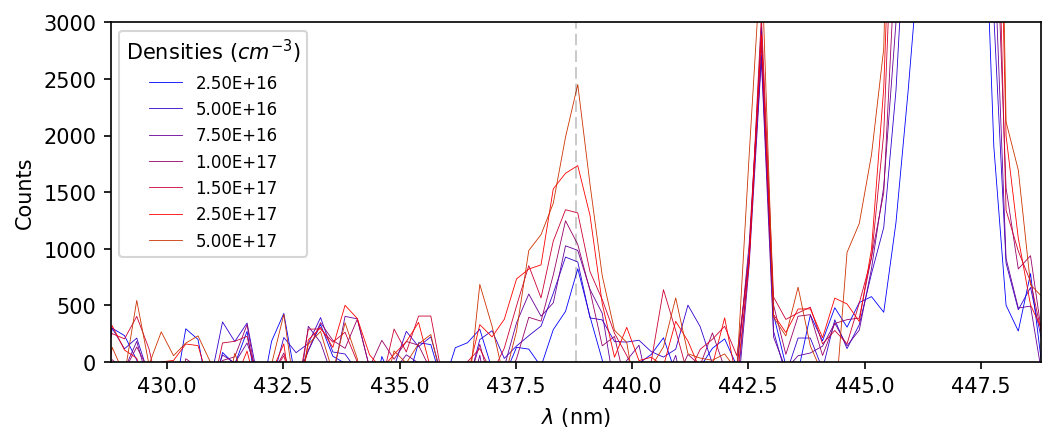

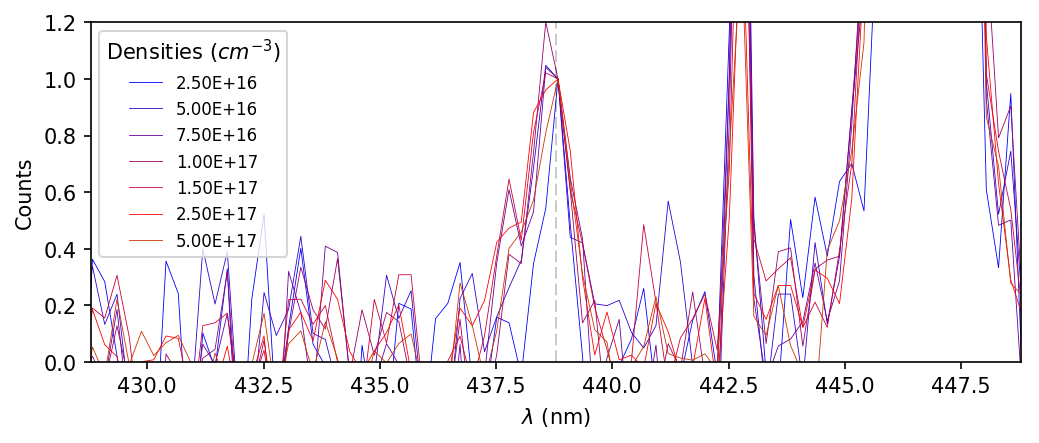

In [34]:
plot_line(intensity[4:], densities[4:], 438.7929, ylim=(0, 3000), lines=[438.7929])

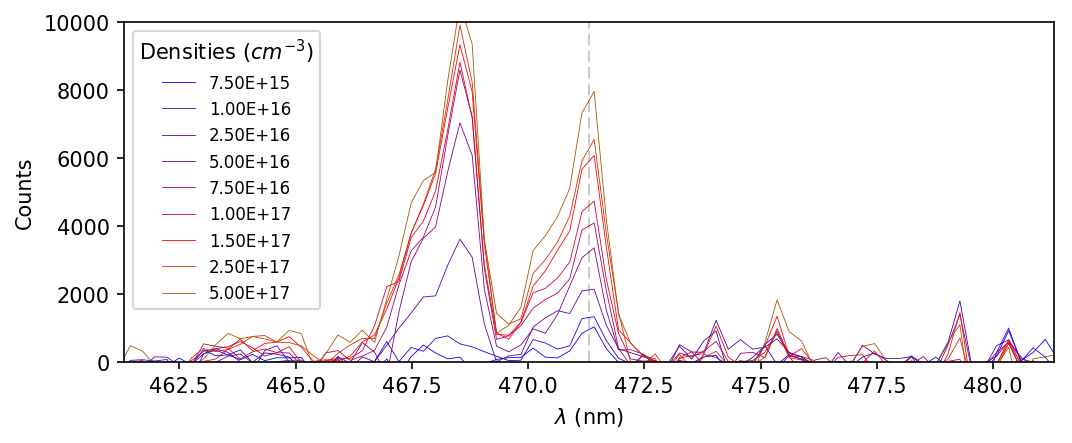

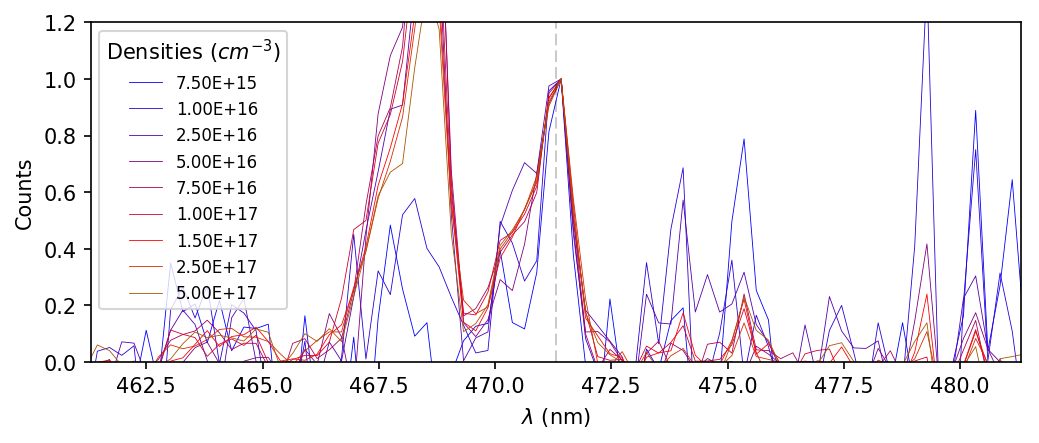

In [38]:
plot_line(intensity[2:], densities[2:], 471.3146, ylim=(0, 10000), lines=[471.3146])

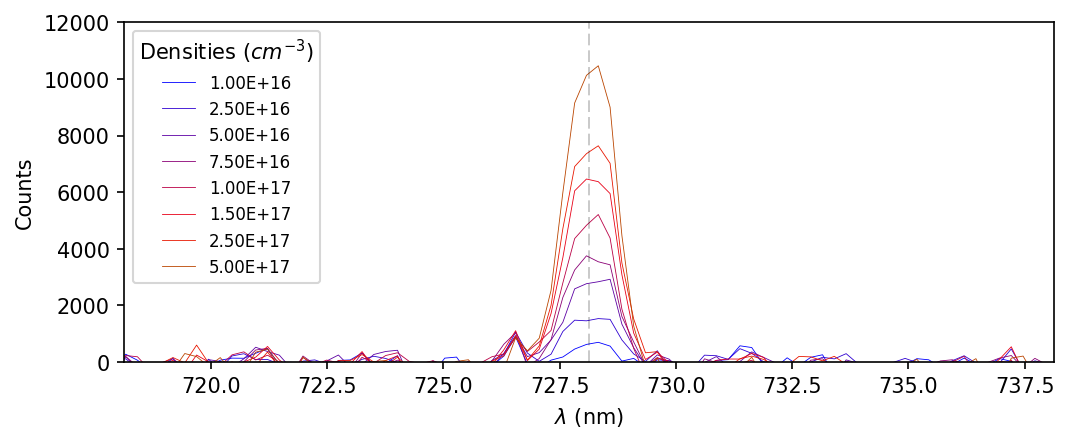

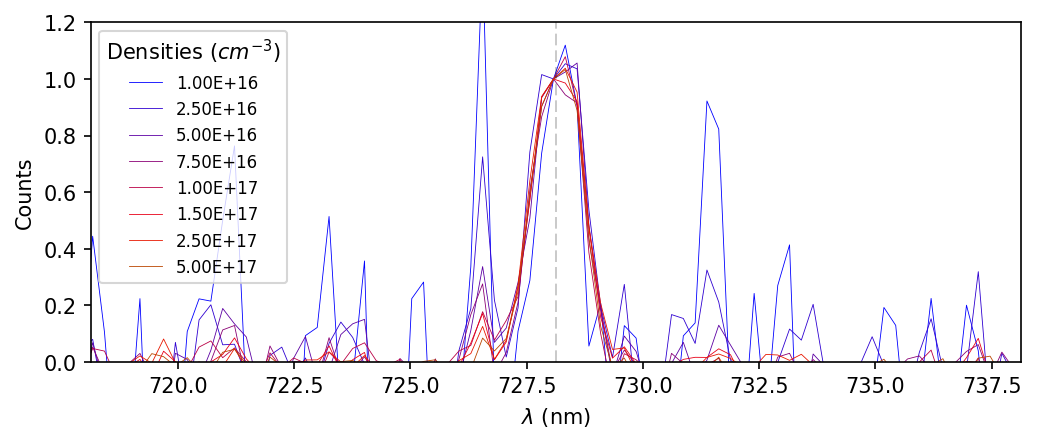

In [42]:
plot_line(intensity[3:], densities[3:], 728.135, ylim=(0, 12000), lines=[728.135])